In [1]:
%config IPCompleter.greedy=True
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

load the dataset

In [2]:
boston=load_boston()
print(type(boston),type(load_boston))

<class 'sklearn.utils.Bunch'> <class 'function'>


 Data is in dictionary, Populate dataframe with data key

In [3]:
print(boston.data)
df=pd.DataFrame(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


Columns are indexed, Fill in Column names with feature_names key

In [83]:
df.columns=boston.feature_names

We need Median Value! boston.data contains only the features, no price value.

In [84]:
df["MEDV"]=pd.DataFrame(boston.target)

In [85]:
df.shape

(506, 14)

In [86]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [87]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# DATA PREPROCESSING

There are values of 0 which can also be missing values.
For good measure, we’ll turn the 0 values into np.nan where we can see what is missing.


In [88]:
df.replace(0.0,np.nan,inplace=True)

In [89]:
df.shape

(506, 14)

In [90]:
df.isnull().sum()/len(df)

CRIM       0.000000
ZN         0.735178
INDUS      0.000000
CHAS       0.930830
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
MEDV       0.000000
dtype: float64

73% of the ZN feature and 93% of CHAS feature are missing,hence we will leave them

In [91]:
df.drop('ZN',axis=1,inplace=True)
df.drop('CHAS',axis=1,inplace=True)
df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Machine learning algorithms like linear regression, logistic regression, neural network, etc. 
that use gradient descent as an optimization technique require data to be scaled

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dfn=scaler.fit_transform(df[["CRIM","INDUS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]])
print(dfn[0])

[0.         0.06781525 0.31481481 0.57750527 0.64160659 0.26920314
 0.         0.20801527 0.28723404 1.         0.08967991 0.42222222]


In [93]:
print(df.head())

      CRIM  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  \
0  0.00632   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.90   
1  0.02731   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.90   
2  0.02729   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8  392.83   
3  0.03237   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7  394.63   
4  0.06905   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7  396.90   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


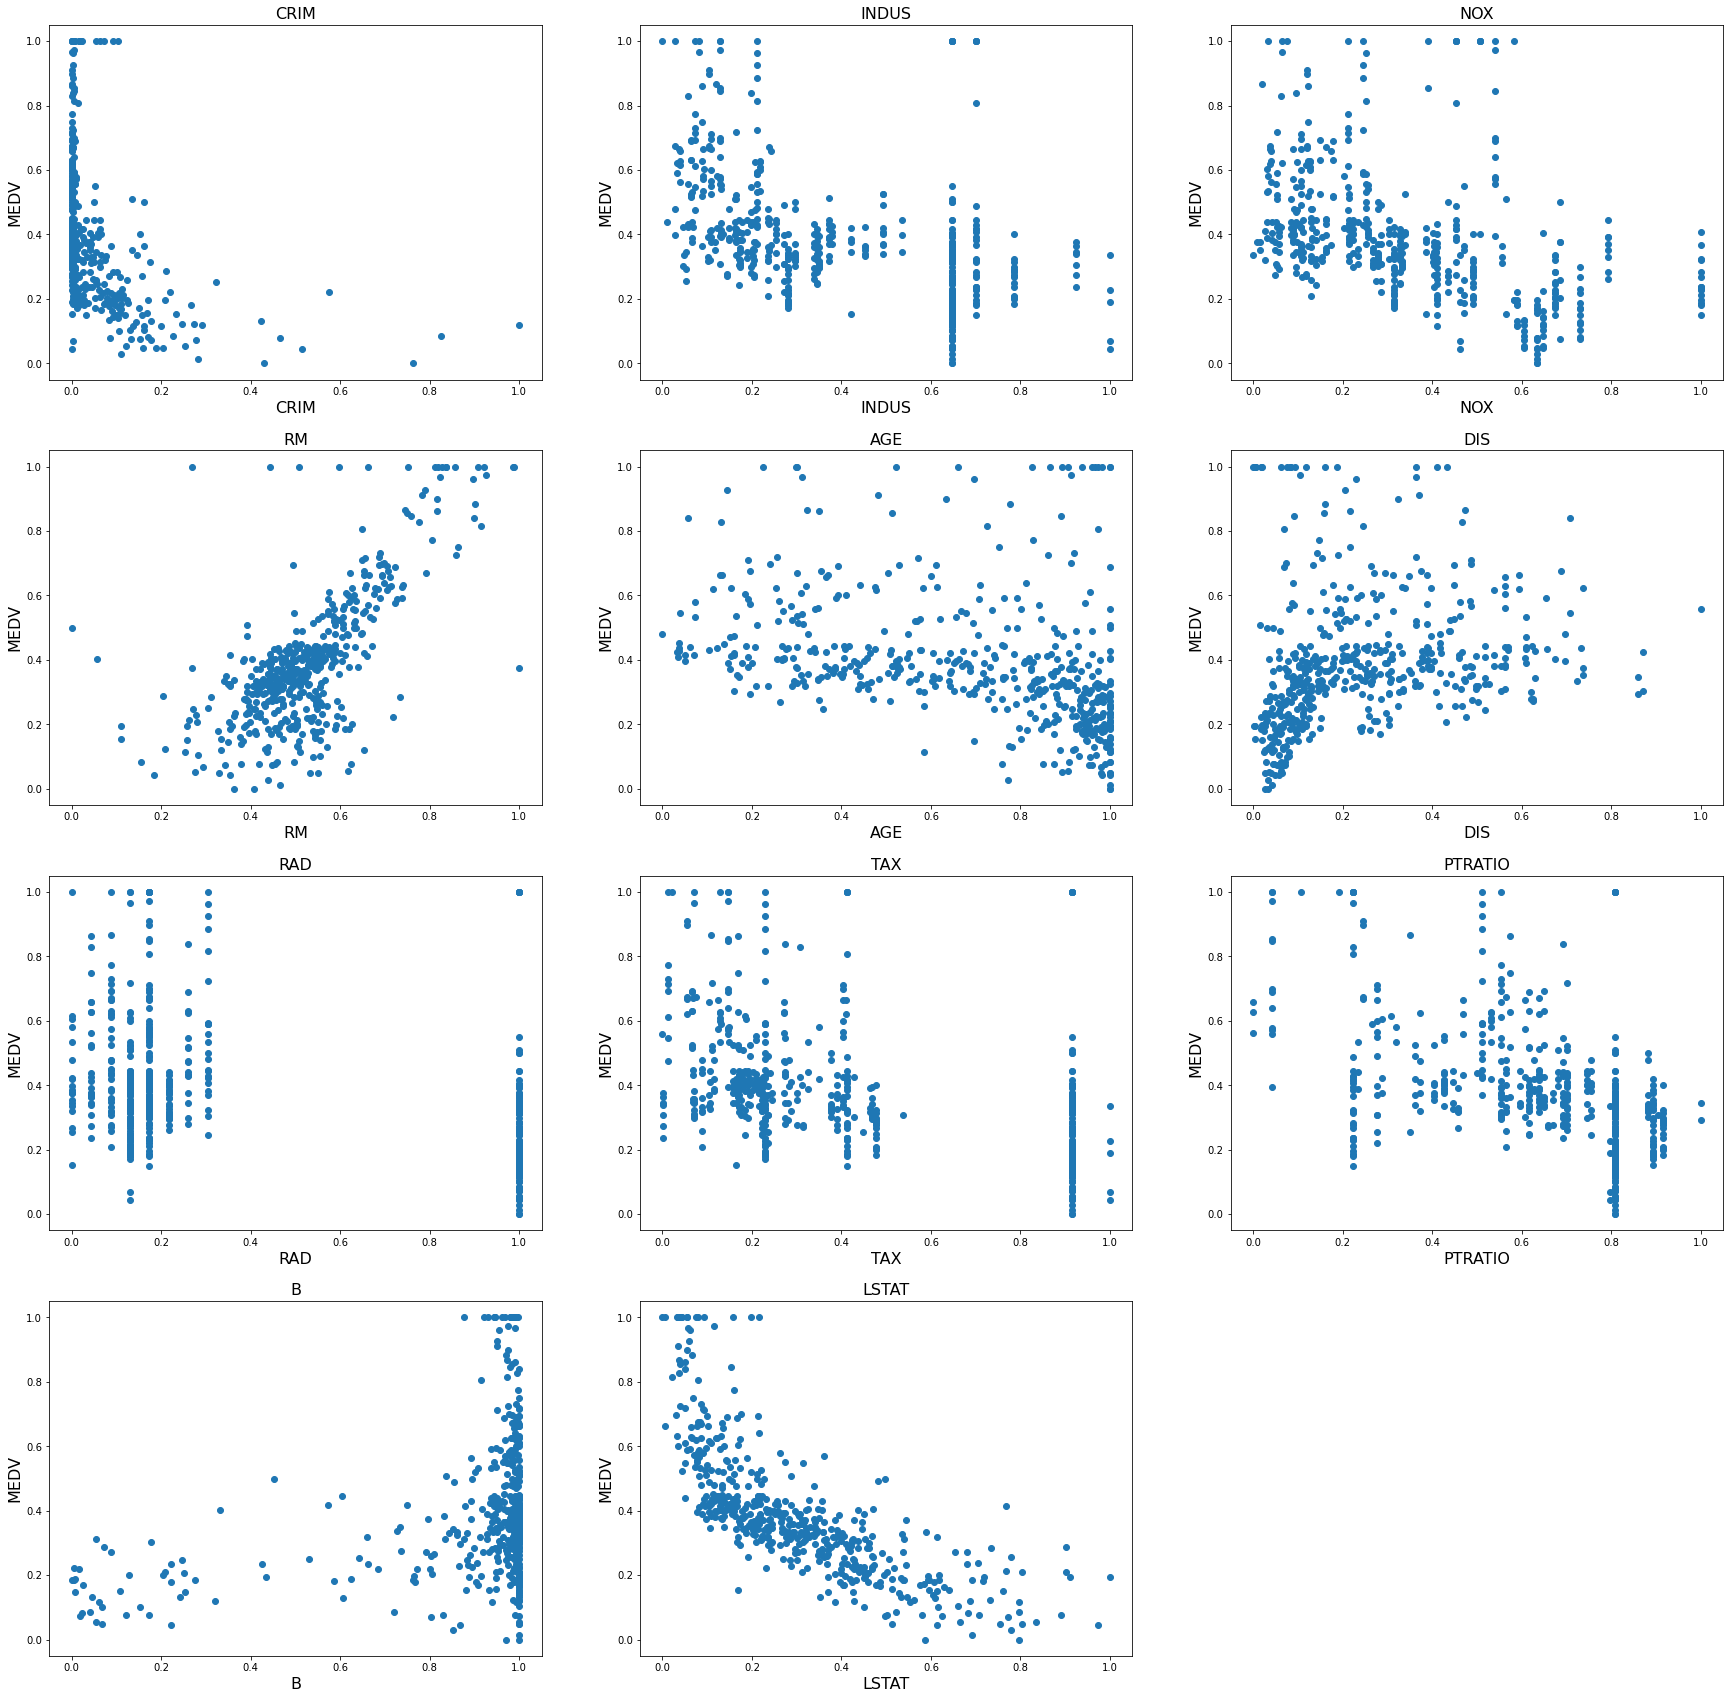

In [94]:
import matplotlib.pyplot as mpl


y=[dfn[i][11] for i in range(506)]
features=df.drop("MEDV",1)
mpl.figure(figsize=(30,30))
for index,feature_name in enumerate(features):
    mpl.subplot(4,3,index+1)
    
    x=[dfn[i][index] for i in range(506)]
    mpl.scatter(x,y)
    mpl.title(feature_name,fontsize=16)
    mpl.xlabel(feature_name,fontsize=16)
    mpl.ylabel("MEDV",fontsize=16)

In [95]:
dfn=pd.DataFrame(dfn)
print(dfn.columns)

RangeIndex(start=0, stop=12, step=1)


In [96]:
print(dfn.head())
dfn.drop(columns=[0,1,2,4,6,7,8,9],inplace=True)

         0         1         2         3         4         5         6   \
0  0.000000  0.067815  0.314815  0.577505  0.641607  0.269203  0.000000   
1  0.000236  0.242302  0.172840  0.547998  0.782698  0.348962  0.043478   
2  0.000236  0.242302  0.172840  0.694386  0.599382  0.348962  0.043478   
3  0.000293  0.063050  0.150206  0.658555  0.441813  0.448545  0.086957   
4  0.000705  0.063050  0.150206  0.687105  0.528321  0.448545  0.086957   

         7         8         9         10        11  
0  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.104962  0.553191  0.989737  0.063466  0.660000  
3  0.066794  0.648936  0.994276  0.033389  0.631111  
4  0.066794  0.648936  1.000000  0.099338  0.693333  


log transformation of lstat

In [97]:
dfn[9]=dfn[10].apply(np.log)

Text(0, 0.5, 'medv')

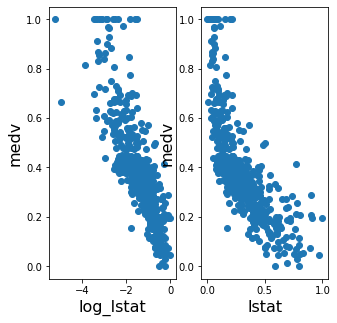

In [98]:
mpl.figure(figsize=(5,5))
mpl.subplot(1,2,1)
mpl.scatter(dfn[9],dfn[11])
mpl.xlabel("log_lstat",fontsize=16)
mpl.ylabel("medv",fontsize=16)
mpl.subplot(1,2,2)
mpl.scatter(dfn[10],dfn[11])
mpl.xlabel('lstat',fontsize=16)
mpl.ylabel("medv",fontsize=16)

# model building

In [99]:
print(dfn.head())
x_tr,x_te,y_tr,y_te=train_test_split(dfn[[10,3]],dfn[11],test_size=0.34,random_state=5)

         3         5         10        11        9 
0  0.577505  0.269203  0.089680  0.422222 -2.411508
1  0.547998  0.348962  0.204470  0.368889 -1.587333
2  0.694386  0.348962  0.063466  0.660000 -2.757254
3  0.658555  0.448545  0.033389  0.631111 -3.399543
4  0.687105  0.448545  0.099338  0.693333 -2.309230


In [100]:
model=sm.OLS(y_tr,x_tr).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     11   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              1976.
Date:                Fri, 25 Dec 2020   Prob (F-statistic):                   9.40e-185
Time:                        11:41:45   Log-Likelihood:                          228.07
No. Observations:                 333   AIC:                                     -452.1
Df Residuals:                     331   BIC:                                     -444.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
10            -0.3354      0.028    -12.168      0.000      -0.390      -0.281
3              0.9264      0.018     51.067      0.000       0.891       0.962
==============================================================================
Omnibus:                       45.555   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.189
Skew:                           0.474   Prob(JB):                     3.05e-42
Kurtosis:                       6.589   Cond. No.                         2.83
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# model evaluation

In [101]:
from sklearn.metrics import mean_squared_error
y_pre=model.predict(x_te)
print(np.sqrt(mean_squared_error(y_te,y_pre)))

0.13958824577304865


# ROUGH WORK

In [104]:
print(dfn.head())
x_tr,x_te,y_tr,y_te=train_test_split(dfn[[10]],dfn[11],test_size=0.34,random_state=5)

         3         5         10        11        9 
0  0.577505  0.269203  0.089680  0.422222 -2.411508
1  0.547998  0.348962  0.204470  0.368889 -1.587333
2  0.694386  0.348962  0.063466  0.660000 -2.757254
3  0.658555  0.448545  0.033389  0.631111 -3.399543
4  0.687105  0.448545  0.099338  0.693333 -2.309230


In [105]:
model=sm.OLS(y_tr,x_tr).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     11   R-squared (uncentered):                   0.314
Model:                            OLS   Adj. R-squared (uncentered):              0.312
Method:                 Least Squares   F-statistic:                              151.9
Date:                Fri, 25 Dec 2020   Prob (F-statistic):                    5.41e-29
Time:                        11:42:32   Log-Likelihood:                         -135.51
No. Observations:                 333   AIC:                                      273.0
Df Residuals:                     332   BIC:                                      276.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
10             0.6912      0.056     12.324      0.000       0.581       0.802
==============================================================================
Omnibus:                        2.310   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                2.062
Skew:                           0.182   Prob(JB):                        0.357
Kurtosis:                       3.125   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""